In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pylab as plt
import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [2]:
movies_df = pd.read_csv('movie_metadata.csv')
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
movies_df.shape

(5043, 28)

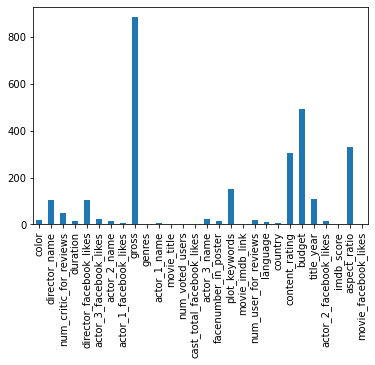

In [4]:
# Bar graph visual
movies_df.isna().sum().plot(kind = "bar")
plt.show()

In [5]:
#pd.options.display.max_columns = 20
#pd.options.display.max_columns = None

In [6]:
movies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [7]:
# Fill missing budget values with central tendency
movies_df[['budget']] = movies_df[['budget']].fillna(value = 
                                                    movies_df['budget'].median())

In [8]:
# Fill missing color values with Color (double checked to make sure they are colored movies)
movies_df[['color']] = movies_df[['color']].fillna(value = 'Color')

In [9]:
# Documentaries with no actors
movies_df[['actor_1_facebook_likes']] = movies_df[['actor_1_facebook_likes']].fillna(value = 0)

# No actor 2
movies_df[['actor_2_facebook_likes']] = movies_df[['actor_2_facebook_likes']].fillna(value = 0)

# No actor 3
movies_df[['actor_3_facebook_likes']] = movies_df[['actor_3_facebook_likes']].fillna(value = 0)

# These movies are in English
movies_df[['language']] = movies_df[['language']].fillna(value = 'English')

In [10]:
# Unavailable
movies_df[['num_critic_for_reviews']] = movies_df[['num_critic_for_reviews']].fillna(value = 0)

In [11]:
# No content rating
movies_df[['content_rating']] = movies_df[['content_rating']].fillna(value = 'Not Rated')

In [12]:
#movies_df[['director_facebook_likes']] = movies_df[['director_facebook_likes']].fillna(value = movies_df['director_facebook_likes'].median())

In [13]:
# Drop unavailable gross because it is dependent
movies_df = movies_df[movies_df['gross'].notna()]

In [14]:
# Manually found durations
movies_df.loc[4392, 'movie_title'] = 'N-Secure'
movies_df.loc[4392, 'duration'] = 105
movies_df.loc[4397, 'movie_title'] = ' Dil Jo Bhi Kahey...'
movies_df.loc[4397, 'duration'] = 144

In [15]:
# These are mini-series so gross would be skewed
movies_df = movies_df[movies_df['director_name'].notna()]

In [16]:
# Movie shot in USA
movies_df.loc[2675, 'country'] = 'USA'

In [17]:
movies_df.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   6
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  13
facenumber_in_poster           7
plot_keywords                 40
movie_imdb_link                0
num_user_for_reviews           1
language                       0
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                 105
movie_facebook_likes           0
dtype: int64

In [18]:
#movies_df[pd.isnull(movies_df['language'])].language

In [19]:
# Use this to see what is dropped when drop_first = True
copy_df = movies_df.copy()
copy_df = pd.get_dummies(movies_df, columns = ['language', 'country', 'content_rating'],
                           drop_first = False)

In [20]:
# Columns dropped due to drop_first = True: 
# language_Aboriginal, country_Afghanistan, content_rating_Approved
copy_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,0,1,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,0,0,0,0,0,1,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,0,0,0,0,0,1,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,0,0,0,0,0,1,0,0,0,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

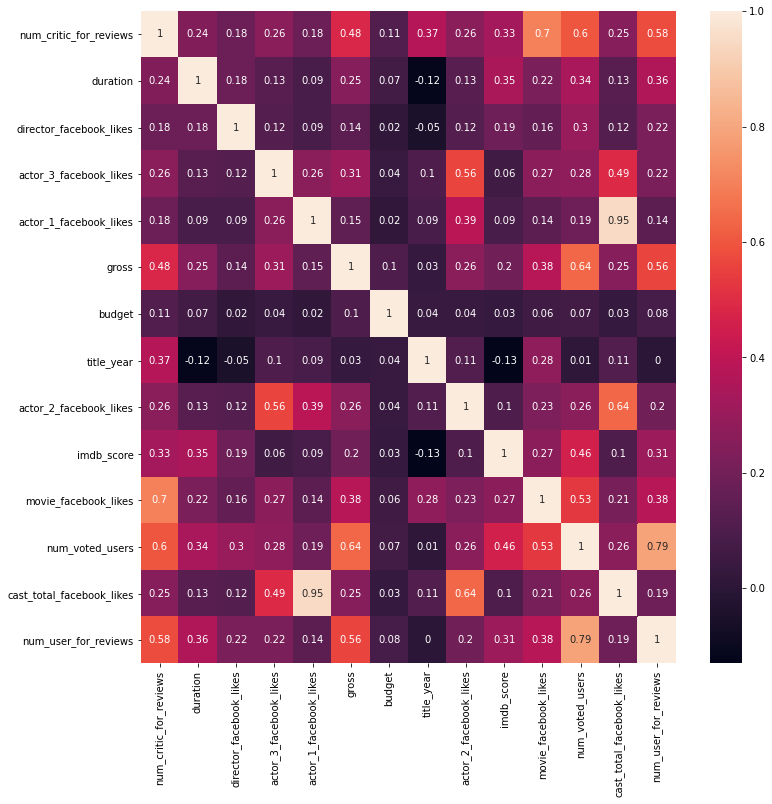

In [21]:
# Heat map / matrix
num_attributes = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
                'actor_1_facebook_likes', 'gross', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
                 'movie_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews']

import seaborn as sns
df = movies_df[num_attributes].corr().round(2)
plt.figure(figsize = (12,12))
sns.heatmap(df, annot=True)


In [22]:
# Final changes for .csv export
movies_df = pd.read_csv('movie_metadata.csv')

# Fill missing budget values with central tendency
movies_df[['budget']] = movies_df[['budget']].fillna(value = 
                                                    movies_df['budget'].median())

# Fill missing color values with Color (double checked to make sure they are colored movies)
movies_df[['color']] = movies_df[['color']].fillna(value = 'Color')

# Documentaries with no actors
movies_df[['actor_1_facebook_likes']] = movies_df[['actor_1_facebook_likes']].fillna(value = 0)

# No actor 2
movies_df[['actor_2_facebook_likes']] = movies_df[['actor_2_facebook_likes']].fillna(value = 0)

# No actor 3
movies_df[['actor_3_facebook_likes']] = movies_df[['actor_3_facebook_likes']].fillna(value = 0)

# These movies are in English
movies_df[['language']] = movies_df[['language']].fillna(value = 'English')

# Unavailable
movies_df[['num_critic_for_reviews']] = movies_df[['num_critic_for_reviews']].fillna(value = 0)

# No content rating
movies_df[['content_rating']] = movies_df[['content_rating']].fillna(value = 'Not Rated')

# Drop unavailable gross because it is dependent
movies_df = movies_df[movies_df['gross'].notna()]

# Manually found durations
movies_df.loc[4392, 'movie_title'] = 'N-Secure'
movies_df.loc[4392, 'duration'] = 105
movies_df.loc[4397, 'movie_title'] = ' Dil Jo Bhi Kahey...'
movies_df.loc[4397, 'duration'] = 144

# These are mini-series so gross would be skewed
movies_df = movies_df[movies_df['director_name'].notna()]

# Movie shot in USA
movies_df.loc[2675, 'country'] = 'USA'

# Drop actor_1_facebook_likes since it is highly correlated with cast_total_facebook_likes
# Drop num_user_for_reviews since it is highly correlated with num_voted_users

movies_df = movies_df.drop(['actor_1_name', 'actor_2_name', 'actor_3_name', 'genres',
                'facenumber_in_poster', 'movie_imdb_link', 'num_critic_for_reviews',
                'aspect_ratio', 'plot_keywords', 'color', 'actor_1_facebook_likes',
                'num_user_for_reviews'], axis = 1)

# Create dummy binary variables
movies_df = pd.get_dummies(movies_df, columns = ['language', 'country', 'content_rating'],
                           drop_first = True)



In [23]:
movies_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4156 entries, 0 to 5042
Data columns (total 110 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    director_name              object 
 1    duration                   float64
 2    director_facebook_likes    float64
 3    actor_3_facebook_likes     float64
 4    gross                      float64
 5    movie_title                object 
 6    num_voted_users            int64  
 7    cast_total_facebook_likes  int64  
 8    budget                     float64
 9    title_year                 float64
 10   actor_2_facebook_likes     float64
 11   imdb_score                 float64
 12   movie_facebook_likes       int64  
 13   language_Arabic            uint8  
 14   language_Aramaic           uint8  
 15   language_Bosnian           uint8  
 16   language_Cantonese         uint8  
 17   language_Chinese           uint8  
 18   language_Czech             uint8  
 19   language_Danish          

In [24]:
# Change floats to int
predictors = ['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'num_voted_users', 
              'cast_total_facebook_likes', 'budget', 'title_year', 'actor_2_facebook_likes', 
              'movie_facebook_likes', 'language_Arabic', 'language_Aramaic', 'language_Bosnian', 
              'language_Cantonese', 'language_Chinese', 'language_Czech', 'language_Danish', 
              'language_Dari', 'language_Dutch', 'language_Dzongkha', 'language_English', 
              'language_Filipino', 'language_French', 'language_German', 'language_Greek', 
              'language_Hebrew', 'language_Hindi', 'language_Hungarian', 'language_Icelandic', 
              'language_Indonesian', 'language_Italian', 'language_Japanese', 'language_Kazakh', 
              'language_Korean', 'language_Mandarin', 'language_Maya', 'language_Mongolian', 
              'language_None', 'language_Norwegian', 'language_Persian', 'language_Polish', 
              'language_Portuguese', 'language_Romanian', 'language_Russian', 'language_Spanish', 
              'language_Swedish', 'language_Telugu', 'language_Thai', 'language_Vietnamese', 
              'language_Zulu', 'country_Argentina', 'country_Aruba', 'country_Australia', 
              'country_Belgium', 'country_Brazil', 'country_Cameroon', 'country_Canada', 
              'country_Chile', 'country_China', 'country_Colombia', 'country_Czech Republic', 
              'country_Denmark', 'country_Finland', 'country_France', 'country_Georgia', 
              'country_Germany', 'country_Greece', 'country_Hong Kong', 'country_Hungary', 
              'country_Iceland', 'country_India', 'country_Indonesia', 'country_Iran', 
              'country_Ireland', 'country_Israel', 'country_Italy', 'country_Japan', 
              'country_Mexico', 'country_Netherlands', 'country_New Line', 'country_New Zealand', 
              'country_Norway', 'country_Peru', 'country_Philippines', 'country_Poland', 
              'country_Romania', 'country_Russia', 'country_South Africa', 'country_South Korea', 
              'country_Spain', 'country_Sweden', 'country_Taiwan', 'country_Thailand', 'country_UK', 
              'country_USA', 'country_West Germany', 'content_rating_G', 'content_rating_GP', 
              'content_rating_M', 'content_rating_NC-17', 'content_rating_Not Rated', 
              'content_rating_PG', 'content_rating_PG-13', 'content_rating_Passed', 'content_rating_R', 
              'content_rating_Unrated', 'content_rating_X']
for i in predictors:
    movies_df[i] = movies_df[i].astype('int64')

movies_df.shape

(4156, 110)

In [27]:
movies_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4156 entries, 0 to 5042
Data columns (total 110 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    director_name              object 
 1    duration                   int64  
 2    director_facebook_likes    int64  
 3    actor_3_facebook_likes     int64  
 4    gross                      float64
 5    movie_title                object 
 6    num_voted_users            int64  
 7    cast_total_facebook_likes  int64  
 8    budget                     int64  
 9    title_year                 int64  
 10   actor_2_facebook_likes     int64  
 11   imdb_score                 float64
 12   movie_facebook_likes       int64  
 13   language_Arabic            int64  
 14   language_Aramaic           int64  
 15   language_Bosnian           int64  
 16   language_Cantonese         int64  
 17   language_Chinese           int64  
 18   language_Czech             int64  
 19   language_Danish          

In [26]:
#movies_df.to_csv(r'C:\Users\Darion\Desktop\372\Project Files\Movies.csv', index = False)